# Visualizing States

## Initial setup

In [2]:
from vizdoom import *
import sys
sys.path.insert(0, "../python")
from helper import create_network, create_agent
import tensorflow as tf
import numpy as np
import math
from time import time
import copy
import skimage.transform
import matplotlib.pyplot as plt
%matplotlib inline

## Single screenshot

### Create game

In [37]:
tf.reset_default_graph()

agent_file = "../agents/ddqn.json"
config_file = "../config/open_field.cfg"
results_dir = "../experiments/tools/screens/open_field_map03/"
action_set = "basic_three"

game = DoomGame()
game.load_config(config_file)
game.init()

agent = create_agent(agent_file,
                     game=game, 
                     params_file=None,
                     action_set=action_set,
                     output_directory=results_dir)


Mapping of agent states --> network states:
screen --> Tensor("main_network/screen:0", shape=(?, 84, 84, 3), dtype=float32)
[vizdoom.vizdoom.GameVariable.USER10, vizdoom.vizdoom.GameVariable.USER11] --> Tensor("main_network/r-theta:0", shape=(?, 2), dtype=float32)


In [38]:
agent.initialize_new_episode()
agent.make_action(agent.actions[0], 10)
screen = game.get_state().screen_buffer
state = agent.state[0]
print(screen.shape)
print(state.shape)

(3, 225, 400)
(84, 84, 3)


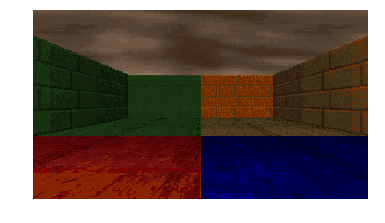

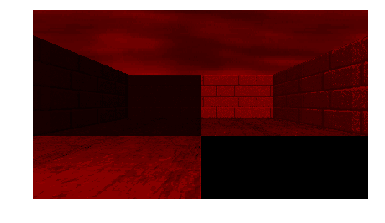

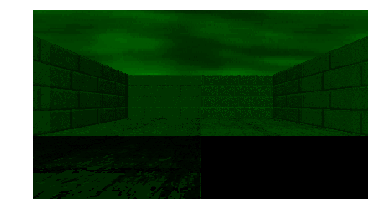

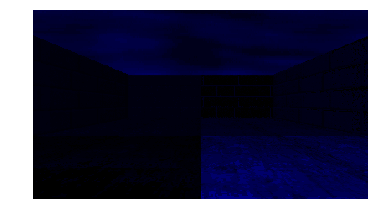

In [39]:
# Full color
fig, axes = plt.subplots()
img = axes.imshow(np.transpose(screen, [1, 2, 0]))
ax = img.axes.axis('off')
plt.savefig(results_dir + "screen.png", bbox_inches='tight')

# Red channel
fig, axes = plt.subplots()
screen_red = copy.copy(screen)
screen_red[1:, :, :] = 0
img = axes.imshow(np.transpose(screen_red, [1, 2, 0]))
ax = img.axes.axis('off')
plt.savefig(results_dir + "screen_red.png", bbox_inches='tight')

# Green channel
fig, axes = plt.subplots()
screen_green = copy.copy(screen)
screen_green[0::2, :, :] = 0
img = axes.imshow(np.transpose(screen_green, [1, 2, 0]))
ax = img.axes.axis('off')
plt.savefig(results_dir + "screen_green.png", bbox_inches='tight')

# Blue channel
fig, axes = plt.subplots()
screen_blue = copy.copy(screen)
screen_blue[:-1, :, :] = 0
img = axes.imshow(np.transpose(screen_blue, [1, 2, 0]))
ax = img.axes.axis('off')
plt.savefig(results_dir + "screen_blue.png", bbox_inches='tight')

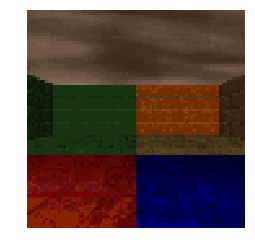

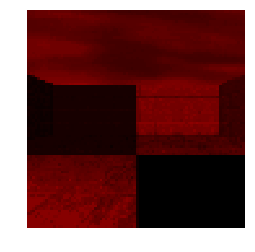

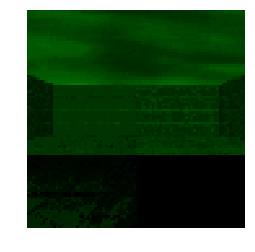

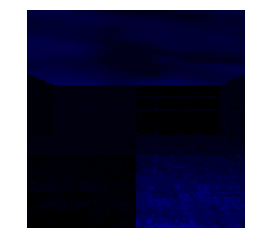

In [40]:
fig, axes = plt.subplots()
img = axes.imshow(state)
ax = img.axes.axis('off')
plt.savefig(results_dir + "state.png", bbox_inches='tight')

# Red channel
fig, axes = plt.subplots()
state_red = copy.copy(state)
state_red[:, :, 1:] = 0
img = axes.imshow(state_red)
ax = img.axes.axis('off')
plt.savefig(results_dir + "state_red.png", bbox_inches='tight')

# Green channel
fig, axes = plt.subplots()
state_green = copy.copy(state)
state_green[:, :, 0::2] = 0
img = axes.imshow(state_green)
ax = img.axes.axis('off')
plt.savefig(results_dir + "state_green.png", bbox_inches='tight')

# Blue channel
fig, axes = plt.subplots()
state_blue = copy.copy(state)
state_blue[:, :, :-1] = 0
img = axes.imshow(state_blue)
ax = img.axes.axis('off')
plt.savefig(results_dir + "state_blue.png", bbox_inches='tight')

In [24]:
game.close()
plt.close('all')

## User controlled episode

In [17]:
config_file_path = "../config/radial_maze.cfg" # must be in SPECTATOR mode
episodes = 1
game = DoomGame()
game.load_config(config_file_path)
game.set_window_visible(True)
game.init()

states = []
coordinates = []
actions = []
rewards = []
for i in range(episodes):
    # Create new episode
    game.new_episode()
    while not game.is_episode_finished():
        # Get state, advance current user action, and obtain reward
        states.append(game.get_state())
        x = game.get_game_variable(GameVariable.POSITION_X)
        y = game.get_game_variable(GameVariable.POSITION_Y)
        z = game.get_game_variable(GameVariable.POSITION_Z)
        angle = game.get_game_variable(GameVariable.ANGLE)
        coordinates.append(np.array([x, y, z, angle]))
        game.advance_action()
        actions.append(game.get_last_action())
        rewards.append(game.get_last_reward())

    print("Episode %d finished!\r" % i, end="")

print("\nDone.")
game.close()

Episode 0 finished!
Done.


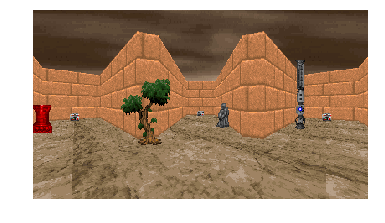

In [18]:
fig, ax = plt.subplots()
ax.axis("off")
ax.imshow(states[-1].screen_buffer.transpose([1, 2, 0]))

Last reward: 0.99
Last state transition:


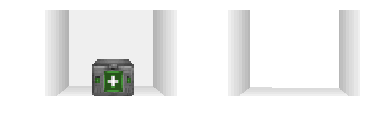

In [80]:
print("Last reward: %.2f" % rewards[-2])
print("Last state transition:")
fig, ax = plt.subplots(1, 2)
for ax_ in ax:
    ax_.axis('off')
s1 = ax[0].imshow(states[-2].screen_buffer.transpose([1, 2, 0]))
s2 = ax[1].imshow(states[-1].screen_buffer.transpose([1, 2, 0]))

## Multiple gifs

In [50]:
from PIL import Image
import matplotlib.pyplot as plt
% matplotlib inline
import numpy as np

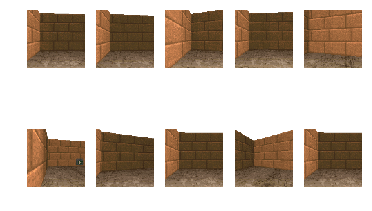

In [81]:
num_gifs = 10
results_dir = "../experiments/pretraining/trial_8/test_data/epoch_100/trial_3/game_data/"
rows = 2
cols = 5
output_dir = "/home/james/Desktop/screens/"

filenames = ["test_episode-%d-state.gif" % i for i in range(1, num_gifs+1)]
gifs = []
for i, f in enumerate(filenames):
    img = Image.open(results_dir + f)
    imgs = []
    j = 1
    while img:
        imgs.append(img.convert('RGB'))
        try:
            img.seek(j)
            j += 1
        except EOFError:
            break
    gifs.append(imgs)


fig, axes = plt.subplots(rows, cols)
gifs_finished = np.zeros(num_gifs, dtype=np.bool)
for i in range(axes.size):
    axes[i//cols][i%cols].axis('off')

i = 0
while not gifs_finished.all():
    for j, gif in enumerate(gifs):
        ax = axes[j//cols][j%cols] 
        try:
            ax.imshow(gif[i])
        except IndexError:
            ax.imshow(gif[-1])
            gifs_finished[j] = True
    plt.savefig(output_dir + 'image-%d.png' % i)
    i += 1

In [31]:
# Adapted from Toolbox
import moviepy.editor as mpy

def make_gif(images, filepath, duration=None, fps=35, channels=1, color_format='RGB'):
    def make_frame(t):
        # Grab image, accounting for rounding error
        idx = int(round(t * fps_))
        try: 
            img = images[idx]
        except IndexError: # out of bounds
            img = images[-1]

        # Convert to [H, W, C] if not already
        if img.shape[0] == channels:
            img = np.transpose(img, [1, 2, 0])

        # If color, ensure channels in RGB order;
        # if grayscale, trim to [H, W]
        if channels == 4:
            r = color_format.find("R")
            g = color_format.find("G")
            b = color_format.find("B")
            img = img[..., [r, g, b, 3]]
        elif channels == 3:
            r = color_format.find("R")
            g = color_format.find("G")
            b = color_format.find("B")
            img = img[..., [r, g, b]]
        elif channels == 1:
            img = np.squeeze(img)

        # Rescale to [0, 255] if necessary
        if np.max(img) <= 1.0:
            img = 255.0 * img

        return img

    # Determine duration and/or frames per second
    if duration is not None:
        # Make clip of specified duration (not guaranteed to include
        # all images)
        duration_ = duration
        fps_ = len(images) / duration_
    else:
        # Make clip of entire sequence to match frame rate
        duration_ = len(images) / fps
        fps_ = fps

    # Create .gif file
    clip = mpy.VideoClip(make_frame, duration=duration_)
    if not filepath.endswith(".gif"):
        filepath += ".gif"
    clip.write_gif(filepath, fps=fps_)

In [85]:
import imageio
import os

image_range = [0, 250]

images = []
numbers = []
for filename in sorted(os.listdir(output_dir)):
    images.append(imageio.imread(output_dir + filename))
    start = filename.find('-') + 1
    end = filename.find('.')
    num = filename[start:end]
    numbers.append(int(num))

images = np.asarray(images)[np.argsort(numbers)]
images = images[image_range[0]:image_range[1]]

gif_filepath= "/home/james/Desktop/screens/test"
make_gif(images, gif_filepath, channels=4)


[MoviePy] Building file /home/james/Desktop/screens/test.gif with imageio


100%|██████████| 251/251 [00:04<00:00, 54.67it/s]


In [57]:
sorted(os.listdir(output_dir))

['0.png',
 '1.png',
 '10.png',
 '100.png',
 '101.png',
 '102.png',
 '103.png',
 '104.png',
 '105.png',
 '106.png',
 '107.png',
 '108.png',
 '109.png',
 '11.png',
 '110.png',
 '111.png',
 '112.png',
 '113.png',
 '114.png',
 '115.png',
 '116.png',
 '117.png',
 '118.png',
 '119.png',
 '12.png',
 '120.png',
 '121.png',
 '122.png',
 '123.png',
 '124.png',
 '125.png',
 '126.png',
 '127.png',
 '128.png',
 '129.png',
 '13.png',
 '130.png',
 '131.png',
 '132.png',
 '133.png',
 '134.png',
 '135.png',
 '136.png',
 '137.png',
 '138.png',
 '139.png',
 '14.png',
 '140.png',
 '141.png',
 '142.png',
 '143.png',
 '144.png',
 '145.png',
 '146.png',
 '147.png',
 '148.png',
 '149.png',
 '15.png',
 '150.png',
 '151.png',
 '152.png',
 '153.png',
 '154.png',
 '155.png',
 '156.png',
 '157.png',
 '158.png',
 '159.png',
 '16.png',
 '160.png',
 '161.png',
 '162.png',
 '163.png',
 '164.png',
 '165.png',
 '166.png',
 '167.png',
 '168.png',
 '169.png',
 '17.png',
 '170.png',
 '171.png',
 '172.png',
 '173.png',
 '17